In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['BBAS3','LCAM3', 'TECN3','NATU4']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=12
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mrclnndrd/.local/lib/python3.5/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


[*********************100%***********************]  4 of 4 downloaded

In [3]:
stocks_all.head()

Open                         High                    \
             BBAS3.SA LCAM3.SA TECN3.SA   BBAS3.SA LCAM3.SA TECN3.SA   
Date                                                                   
2017-09-28  34.860001    13.33     4.64  34.860001    13.34     4.65   
2017-09-29  34.799999    13.30     4.62  35.230000    13.35     4.73   
2017-10-02  34.779999    13.35     4.61  35.049999    13.35     4.86   
2017-10-03  35.000000    13.42     4.74  36.380001    13.42     4.74   
2017-10-04  36.240002    13.41     4.77  36.480000    13.41     4.78   

                  Low                        Close                    \
             BBAS3.SA LCAM3.SA TECN3.SA   BBAS3.SA LCAM3.SA TECN3.SA   
Date                                                                   
2017-09-28  34.259998    13.10     4.53  34.529999    13.24     4.59   
2017-09-29  34.580002    13.10     4.57  34.900002    13.24     4.57   
2017-10-02  34.529999    13.11     4.58  34.950001    13.25     4.75   
2017-10-03  35.000000    13.20     4.64  36.369999    13.25     4.70   
2017-10-04  35.869999    13.14     4.67  36.200001    13.14     4.72   

            Adj Close                        Volume                    
             BBAS3.SA   LCAM3.SA TECN3.SA  BBAS3.SA LCAM3.SA TECN3.SA  
Date                                                                   
2017-09-28  33.736385  12.904147     4.59   6027100    29700   181800  
2017-09-29  34.097881  12.904147     4.57   6793400    26000   691400  
2017-10-02  34.146732  12.913893     4.75   5444200    25600   217900  
2017-10-03  35.534100  12.913893     4.70  12543100    19900   443500  
2017-10-04  35.368004  12.806684     4.72   9626000    19900   203400

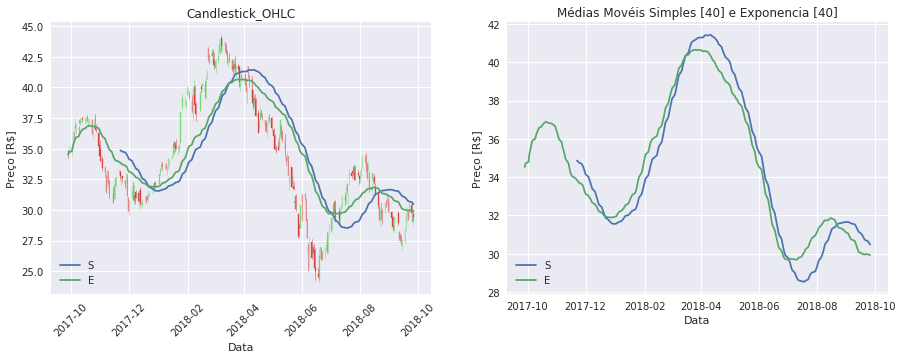

In [11]:

stocks_all.head()
stock=pd.concat([ stocks_all.Open[Stocks[0]], stocks_all.High[Stocks[0]], stocks_all.Low[Stocks[0]], stocks_all.Close[Stocks[0]], 
              stocks_all.Volume[Stocks[0]]] , axis=1)  
stock.columns=['Open','High','Low','Close','Volume']
stock.head()

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5))

data = stock.reset_index()
data['Date2'] = data['Date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
tuples = [tuple(x) for x in data[['Date2','Open','High','Low','Close']].values]


candlestick_ohlc(ax[0], tuples, width=0.5, colorup='#77d879', colordown='#db3f3f')  

for label in ax[0].xaxis.get_ticklabels():
    label.set_rotation(45)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[0].xaxis.set_major_locator(mticker.MaxNLocator(10))

PS=40
PE=40

stock['rolling']= stock['Close'].rolling(window=PS).mean()
stock['ema'] = stock['Close'].ewm(span=PE).mean() 

ax[0].plot(stock['rolling'], label='S')
ax[0].plot(stock['ema'],label='E')
ax[1].plot(stock['rolling'],label='S')
ax[1].plot(stock['ema'],label='E')
ax[0].set_ylabel("Preço [R$]")
ax[0].set_xlabel("Data")
ax[0].set_title("Candlestick_OHLC")
ax[0].legend(loc='lower left')
ax[1].legend(loc='lower left')

ax[1].set_ylabel("Preço [R$]")
ax[1].set_xlabel("Data")
ax[1].set_title("Médias Movéis Simples ["+str(PS)+"] e Exponencia ["+str(PE)+"]")

plt.show()



In [13]:
def MACD(stock):        
        stock['26 ema'] = stock['Close'].ewm(span=26,adjust=False).mean() 
        stock['12 ema'] = stock['Close'].ewm(span=12,adjust=False).mean() 
        stock['MACD'] = (stock['12 ema'] - stock['26 ema'])
        stock['Signal Line'] = stock['MACD'].ewm(span=9,adjust=False).mean()
        stock['HisM'] = stock['MACD'] - stock['Signal Line']
        return stock     

Text(0.5,0,'Data')

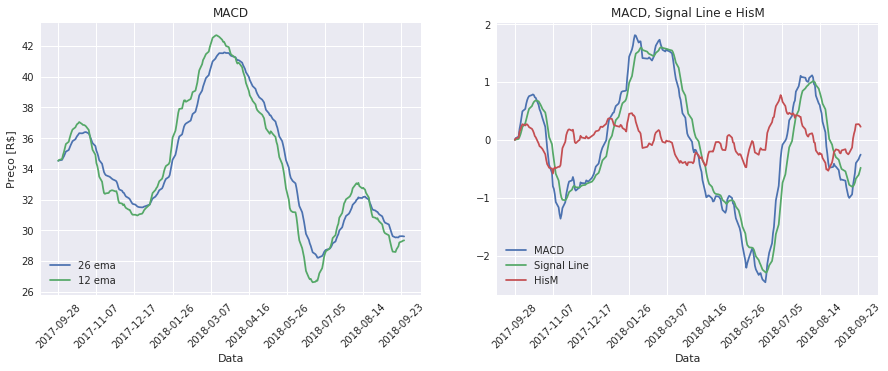

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5))
ax[0].plot(MACD(stock)['26 ema'],label='26 ema')
ax[0].plot(MACD(stock)['12 ema'],label='12 ema')
ax[0].legend(loc='lower left')
for label in ax[0].xaxis.get_ticklabels():
    label.set_rotation(45)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[0].xaxis.set_major_locator(mticker.MaxNLocator(10))
ax[0].set_ylabel("Preço [R$]")
ax[0].set_xlabel("Data")
ax[0].set_title("MACD")

ax[1].plot(MACD(stock)['MACD'],label='MACD')
ax[1].plot(MACD(stock)['Signal Line'],label='Signal Line')
ax[1].plot(MACD(stock)['HisM'],label='HisM')
ax[1].legend(loc='lower left')
for label in ax[1].xaxis.get_ticklabels():
    label.set_rotation(45)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(10))
ax[1].set_title("MACD, Signal Line e HisM")
ax[1].set_xlabel("Data")

In [15]:
def IFR(stock, period=14):
    delta = stock['Close'].diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u = u.ewm(span=80,min_periods=0,adjust=False).mean() #first value is sum of avg gains
    d = d.ewm(span=80,min_periods=0,adjust=False).mean() #first value is sum of avg losses
    stock['IFR']=100 - 100 / (1 + u/d)
    return stock


Text(0.5,0,'Data')

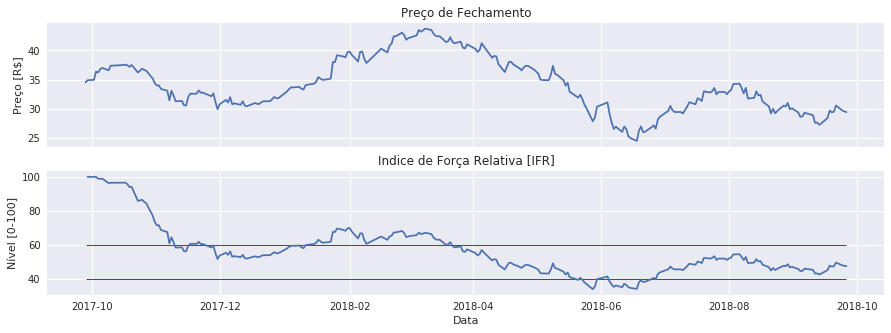

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,5))

ax[0].plot(stock['Close'])
ax[0].set_ylabel('Preço [R$]')
ax[0].set_title('Preço de Fechamento')

ax[1].plot(IFR(stock)['IFR'])
ax[1].hlines(y=60, xmin=IFR(stock)['IFR'].index[0], xmax=IFR(stock)['IFR'].index[-1], linewidth=1, color='r')
c=ax[1].hlines(y=40, xmin=IFR(stock)['IFR'].index[0], xmax=IFR(stock)['IFR'].index[-1], linewidth=1, color='r')

#c.remove()

ax[1].set_title('Indice de Força Relativa [IFR]')
ax[1].set_ylabel('Nível [0-100]')
ax[1].set_xlabel('Data')

/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
  after removing the cwd from sys.path.


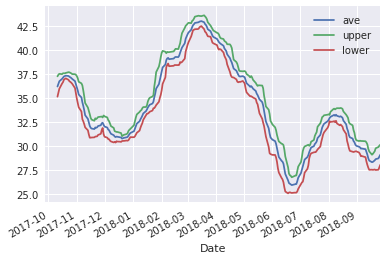

In [17]:
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

stock['ave'], stock['upper'], stock['lower'] = bbands(stock['Close'], length=10, numsd=1)
stock[['ave','upper','lower']].plot()